In [67]:
import numpy as np
import random

In [81]:
class Problem:
    def __init__(self, num_city, distance_matrix):
        self.num_city = num_city
        self.distance_matrix = distance_matrix

    def cal_objective(self, solution):
        total = 0
        for i in range(self.num_city):
            total += self.distance_matrix[solution[i]][solution[(i + 1) % self.num_city]]
        return total
        

In [84]:
import pandas as pd
import numpy as np

# -------------------- TSP Problem --------------------
num_city = 10
distance_matrix = np.random.uniform(10, 100, (num_city, num_city))
distance_matrix = (distance_matrix + distance_matrix.T) / 2
np.fill_diagonal(distance_matrix, 0)

TSPProblem = Problem(num_city, distance_matrix)

print("The number of cities:", TSPProblem.num_city)
print("The distance matrix:")

df = pd.DataFrame(TSPProblem.distance_matrix,
                  index=[f"City {i}" for i in range(num_city)],
                  columns=[f"City {i}" for i in range(num_city)])
print(df.round(1))


The number of cities: 10
The distance matrix:
        City 0  City 1  City 2  City 3  City 4  City 5  City 6  City 7  \
City 0     0.0    36.1    88.7    62.5    85.6    27.7    54.9    68.6   
City 1    36.1     0.0    34.3    82.4    63.3    78.8    66.9    70.5   
City 2    88.7    34.3     0.0    58.0    48.1    65.8    49.7    36.2   
City 3    62.5    82.4    58.0     0.0    54.4    79.1    64.1    67.6   
City 4    85.6    63.3    48.1    54.4     0.0    72.0    92.3    60.4   
City 5    27.7    78.8    65.8    79.1    72.0     0.0    37.5    55.3   
City 6    54.9    66.9    49.7    64.1    92.3    37.5     0.0    65.6   
City 7    68.6    70.5    36.2    67.6    60.4    55.3    65.6     0.0   
City 8    61.5    77.7    42.5    43.9    37.5    61.7    75.5    54.4   
City 9    29.6    33.2    35.7    44.6    46.9    68.8    79.4    60.2   

        City 8  City 9  
City 0    61.5    29.6  
City 1    77.7    33.2  
City 2    42.5    35.7  
City 3    43.9    44.6  
City 4    37.5

In [85]:
from copy import deepcopy
class Individual:
    def __init__(self):
        self.fitness = None
        self.chromosome = None


    ############################ Integer representation ###########################
    def gen_random(self, problem: Problem):
        self.chromosome = np.random.permutation(problem.num_city)
    
    def decode(self, problem: Problem):
        return self.chromosome

    ############################# Real representation ############################3
    def gen_random_real(self, problem: Problem):
        self.chromosome = np.random.uniform(0, 1, problem.num_city)
    
    def decode_real(self, problem: Problem):
        return np.argsort(self.chromosome)
        

    def cal_fitness(self, problem: Problem):
        solution = self.decode(problem)
        self.fitness = problem.cal_objective(solution)

In [87]:
indi = Individual()
indi.gen_random(TSPProblem)
indi.cal_fitness(TSPProblem)
print(indi.chromosome)
print(indi.fitness)


[4 6 0 8 2 5 1 3 7 9]
652.7655217028362


In [88]:
class Population:
    def __init__(self, pop_size):
        self.pop_size = pop_size
        self.indi_list = []
    def gen_population(self, problem: Problem):
        for i in range(self.pop_size):
            indi = Individual()
            indi.gen_random(problem)
            indi.cal_fitness(problem)
            self.indi_list.append(indi)

In [89]:
class Reproduction_Operators:
    @staticmethod
    def crossover(indi1: Individual, indi2: Individual, problem: Problem):
        p1 = indi1.chromosome.astype(int)
        p2 = indi2.chromosome.astype(int)

        size = problem.num_city
        offspring1 = np.full(size, -1, dtype=int)
        offspring2 = np.full(size, -1, dtype=int)

        # --- Cycle crossover ---
        start = 0
        idx = start
        while offspring1[idx] == -1:
            offspring1[idx] = p1[idx]
            idx = np.where(p1 == p2[idx])[0][0]
        # Fill remaining with p2
        for i in range(size):
            if offspring1[i] == -1:
                offspring1[i] = p2[i]

        start = 0
        idx = start
        while offspring2[idx] == -1:
            offspring2[idx] = p2[idx]
            idx = np.where(p2 == p1[idx])[0][0]
        for i in range(size):
            if offspring2[i] == -1:
                offspring2[i] = p1[i]

        child1 = Individual()
        child2 = Individual()
        child1.chromosome = offspring1
        child2.chromosome = offspring2

        child1.cal_fitness(problem)
        child2.cal_fitness(problem)
        return child1, child2

    @staticmethod
    def mutation(indi: Individual, problem: Problem):
        # Swap mutation
        offspring = Individual()
        offspring.chromosome = deepcopy(indi.chromosome)

        i, j = np.random.choice(problem.num_city, 2, replace=False)
        offspring.chromosome[i], offspring.chromosome[j] = (
            offspring.chromosome[j],
            offspring.chromosome[i],
        )
        offspring.cal_fitness(problem)
        return offspring


In [92]:
parent1 = Individual()
parent1.gen_random(TSPProblem)
parent1.cal_fitness(TSPProblem)

parent2 = Individual()
parent2.gen_random(TSPProblem)
parent2.cal_fitness(TSPProblem)

print("Parent 1: ", parent1.chromosome, " Fitness: ", parent1.fitness)
print("Parent 2: ", parent2.chromosome, " Fitness: ", parent2.fitness)

off1, off2 = Reproduction_Operators.crossover(parent1, parent2, TSPProblem)
print("Offspring 1: ", off1.chromosome, " Fitness: ", off1.fitness)
print("Offspring 2: ", off2.chromosome, " Fitness: ", off2.fitness)

off3 = Reproduction_Operators.mutation(off2, TSPProblem)
print("Offspring 3: ", off3.chromosome, " Fitness: ", off3.fitness)


Parent 1:  [5 1 4 6 7 0 3 2 9 8]  Fitness:  663.7032518640565
Parent 2:  [4 7 0 3 6 5 1 9 8 2]  Fitness:  572.6817335325238
Offspring 1:  [5 7 4 3 6 0 1 9 8 2]  Fitness:  543.515414402799
Offspring 2:  [4 1 0 6 7 5 3 2 9 8]  Fitness:  562.5556864453338
Offspring 3:  [4 0 1 6 7 5 3 2 9 8]  Fitness:  596.8939382676657


In [93]:
def ga(problem: Problem, pop_size, num_generation, pc, pm):
    history = []
    pop = Population(pop_size)
    pop.gen_population(problem)
    pop.indi_list.sort(key=lambda x: x.fitness)

    print(f"Generation 0: {pop.indi_list[0].fitness}")
    history.append(pop.indi_list[0].fitness)

    for gen in range(1, num_generation):
        offspring_list = []
        while len(offspring_list) < pop_size:  
            indi1, indi2 = random.choices(pop.indi_list, k=2)
            if np.random.rand() < pc:
                off1, off2 = Reproduction_Operators.crossover(indi1, indi2, problem)
            else:
                off1, off2 = deepcopy(indi1), deepcopy(indi2)

            if np.random.rand() < pm:
                off1 = Reproduction_Operators.mutation(off1, problem)
            if np.random.rand() < pm:
                off2 = Reproduction_Operators.mutation(off2, problem)

            offspring_list.extend([off1, off2])

        
        pop.indi_list.extend(offspring_list)
        pop.indi_list.sort(key=lambda x: x.fitness)
        pop.indi_list = pop.indi_list[:pop_size]

        print(f"Generation {gen}: {pop.indi_list[0].fitness}")
        history.append(pop.indi_list[0].fitness)

    return pop.indi_list[0], history



In [94]:
best_solution, history = ga(TSPProblem, 100, 100, 0.8, 0.1)

Generation 0: 472.27608564569545
Generation 1: 462.6343978508951
Generation 2: 441.54072491909176
Generation 3: 441.54072491909176
Generation 4: 441.54072491909176
Generation 5: 441.54072491909176
Generation 6: 441.54072491909176
Generation 7: 441.54072491909176
Generation 8: 441.54072491909176
Generation 9: 441.54072491909176
Generation 10: 432.6233627681614
Generation 11: 429.05037637698683
Generation 12: 429.05037637698683
Generation 13: 429.05037637698683
Generation 14: 422.6220812328381
Generation 15: 422.6220812328381
Generation 16: 408.7920043935191
Generation 17: 408.7920043935191
Generation 18: 408.7920043935191
Generation 19: 408.7920043935191
Generation 20: 408.7920043935191
Generation 21: 408.7920043935191
Generation 22: 408.7920043935191
Generation 23: 408.7920043935191
Generation 24: 408.7920043935191
Generation 25: 408.7920043935191
Generation 26: 408.7920043935191
Generation 27: 408.7920043935191
Generation 28: 404.39233725633153
Generation 29: 404.39233725633153
Genera

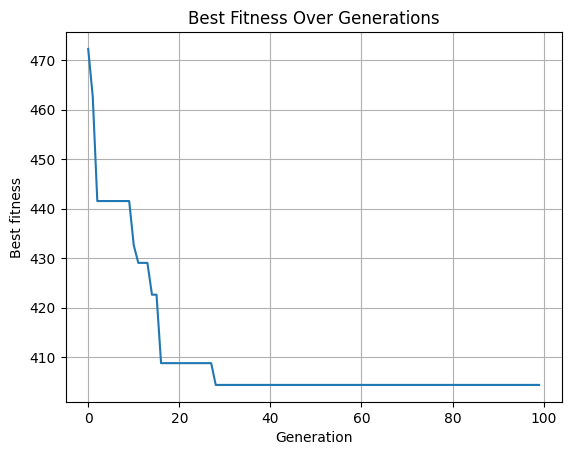

In [95]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.title("Best Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.grid(True)
plt.show()
